#### import libraries

In [1]:
import pandas as pd
import os

#### import and merge the csv files 

#### create a list of sales files 

In [2]:
files = [file for file in os.listdir('Sales_Data')]

#### Get the data from each files = datafile / then merge (concatinade them in a new csv called all_data

In [3]:
# empty data frame
df = pd.DataFrame()

for file in files:
# create datafile by reading each file  one by one in files with read_csv function 
    datafile = pd.read_csv("./Sales_Data/" + file)

    # fill in df (all_months_data) with the datafile (one of the 12 files in sales data) , add one file per loop
    df = pd.concat([df, datafile])

# Create a csv without the index 
df.to_csv("all_data.csv", index = False )

#display data
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


# Clean the data

# Add month column 

In [4]:
df['Month'] = df['Order Date'].str[:2]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06


### remove the NaN 

In [5]:
# display all rows with NaN in all columns
Nan_df = df[df.isna().any(axis=1)]
Nan_df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
12567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12659,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# dropna function to delet rows which contail NaN in all coumns
df = df.dropna(how='all') 

# check if it worked (if it worked, shouldn't display anything)
Nan_df = df[df.isna().any(axis=1)]
Nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


### Remove if contains Or 

In [7]:
# keep only rows which doesn't contain != Or
df = df[df['Month'] != 'Or']
df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12
...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06


In [8]:
# check if there isn't any Or left (shouldn't display anything)
check_df = df[df['Month'] == 'Or']
check_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


### Convert Month int int 

In [9]:
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Convert columns to the right type 

In [10]:
# df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
# df['Price Each'] = df['Price Each'].astype('float')

# better way: use pandas.to_numeric (better because we don't need to choose the type)
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


# Add a sales collumn 

In [11]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


# check sales per month

In [12]:
df.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


# Plotting

In [13]:
import matplotlib.pyplot as plt 

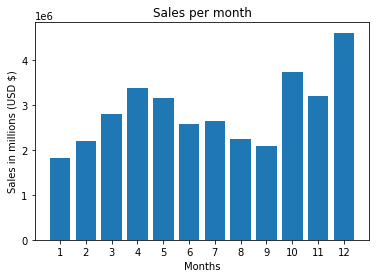

In [14]:
month = range(1,13)
results = df.groupby('Month').sum()

# in our bar plot, x is month and y is sales column in results dataframe
plt.bar(month, results['Sales'])
plt.title('Sales per month')
plt.xticks(month)
plt.xlabel('Months')
plt.ylabel('Sales in millions (USD $)')

plt.show()

# Which city and state had the best sales 

### make a city column 

In [15]:
# get content between comas and        remove what's after the last space 
# add state in () because in the states, some city naes are in duplicates in other states
df['City'] = df['Purchase Address'].str.rsplit(', ').str[-2] + ' (' + df['Purchase Address'].str.rsplit(' ').str[-2] + ')'
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [16]:
# Need index fase to get city in columns otherwise city will be the index and I won't be able to use it for the pie chart 

df_SalesCity = df.groupby('City', as_index = False).sum()
df_SalesCity

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
1,Austin (TX),11153,1.809874e+06,69829,1.819582e+06
2,Boston (MA),22528,3.637410e+06,141112,3.661642e+06
3,Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
4,Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
5,New York City (NY),27932,4.635371e+06,175741,4.664317e+06
6,Portland (ME),2750,4.471893e+05,17144,4.497583e+05
7,Portland (OR),11303,1.860558e+06,70621,1.870732e+06
8,San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06
9,Seattle (WA),16553,2.733296e+06,104941,2.747755e+06


In [17]:
list(df_SalesCity.columns)

['City', 'Quantity Ordered', 'Price Each', 'Month', 'Sales']

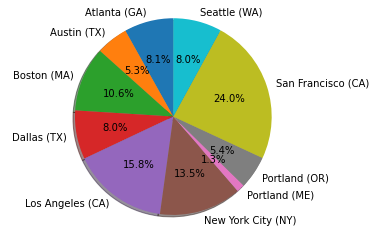

In [18]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#City= df_SalesCity['City']
#Sales = df_SalesCity['Sales']

labels =df_SalesCity['City']
sizes = df_SalesCity['Sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


### Make state column 

In [19]:
# get What's after the last coma in Purchase Adress 
df['State'] = df['Purchase Address'].str.rsplit(', ').str[-1]

# get the 2 first letters only
df['State'] = df['State'].str[:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),GA


### Sales per state 

In [20]:
df_SalesState = df.groupby('State', as_index = False).sum()
df_SalesState.sort_values('Sales', ascending = False)

,State,Quantity Ordered,Price Each,Month,Sales
0,CA,83528,1.363290e+07,523845,1.371477e+07
4,NY,27932,4.635371e+06,175741,4.664317e+06
6,TX,27883,4.562501e+06,174449,4.587557e+06
2,MA,22528,3.637410e+06,141112,3.661642e+06
1,GA,16602,2.779908e+06,104794,2.795499e+06
7,WA,16553,2.733296e+06,104941,2.747755e+06
5,OR,11303,1.860558e+06,70621,1.870732e+06
3,ME,2750,4.471893e+05,17144,4.497583e+05


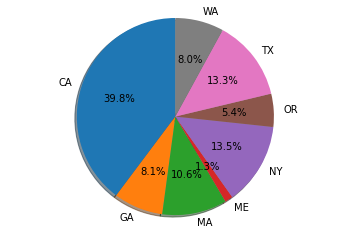

In [21]:
labels =df_SalesState['State']
sizes = df_SalesState['Sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

# What time should I advertise?
Actual 'Order Date' format: 12/30/19 00:01

### change the format 
use the pd.to_datetime function, it makes sure the layout is excactly the same everywhere 

In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),GA


In [23]:
# Thanks to pd.to_datetime, we can easily get access to the hour and minutes 
df['Order Hour'] = df['Order Date'].dt.hour
df['Order Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Order Hour,Order Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),GA,12,38


In [24]:
df_salesHourSum = df.groupby('Order Hour', as_index = False).sum()
df_salesHourSum

,Order Hour,Quantity Ordered,Price Each,Month,Sales,Order Minute
0,0,4428,709296.70,27554,713721.27,103596
1,1,2619,458490.00,16657,460866.88,61807
2,2,1398,233833.64,8507,234851.44,32508
3,3,928,144726.42,5904,145757.89,23044
4,4,937,162058.18,6148,162661.01,26876
5,5,1493,229621.21,9301,230679.82,42877
6,6,2810,445000.11,17539,448113.00,80343
7,7,4556,740568.11,28850,744854.12,127447
8,8,7002,1185970.62,43626,1192348.97,198135
9,9,9816,1628498.49,60981,1639030.58,268253


## Create graph sales per hour 

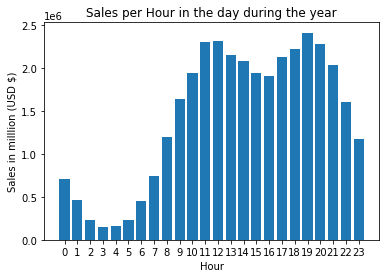

In [25]:
hour = df_salesHourSum['Order Hour']
Sales = df_salesHourSum['Sales']

# in our bar plot, x is month and y is sales column in results dataframe
plt.bar(hour, Sales)
plt.title('Sales per Hour in the day during the year')
plt.xticks(hour)
plt.xlabel('Hour')
plt.ylabel('Sales in milllion (USD $)')

plt.show()

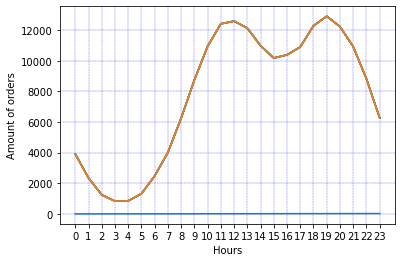

In [26]:
# we could also check the amount of sales (but one row can be more than 1 product, is it relevent? Maybe sum quantity order is better)
df_salesHourCount = df.groupby('Order Hour', as_index = False).count()
Hours = df_salesHourCount['Order Hour']

plt.plot(Hours, df_salesHourCount )
plt.xticks(hour)
plt.grid(color='b', linestyle='--', linewidth=0.3)
plt.xlabel('Hours')
plt.ylabel('Amount of orders')
plt.show()



### around 12 am and 7 pm seems to be a good time to advertise 

## Sales per Minute

In [27]:
df_salesMinuteSum = df.groupby('Order Minute', as_index = False).sum()
df_salesMinuteSum.head()

,Order Minute,Quantity Ordered,Price Each,Month,Sales,Order Hour
0,0,3422,589615.12,21791,593743.84,44059
1,1,3555,569357.98,22323,573711.72,45807
2,2,3470,544226.67,21499,548112.54,44660
3,3,3405,546968.50,21120,550467.80,43346
4,4,3478,572757.65,21621,575744.37,45278


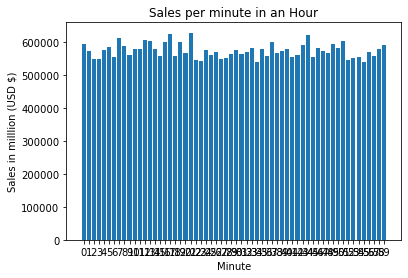

In [28]:
Minute = df_salesMinuteSum['Order Minute']
Sales = df_salesMinuteSum['Sales']

# in our bar plot, x is month and y is sales column in results dataframe
plt.bar(Minute, Sales)
plt.title('Sales per minute in an Hour')
plt.xticks(Minute)
plt.xlabel('Minute')
plt.ylabel('Sales in milllion (USD $)')

plt.show()

#### The minutes in the hour are not really revelant  

# What are the popular items 

In [29]:
#make a new dataframe with produt, Price each, turnover 


In [30]:
# get sum of Quantity Ordered
df_popularity = df.groupby('Product', as_index = False).sum()

# Order the Products ascending so that I can copy the column quantity in the right order for the next dataframe
df_popularity = df_popularity.sort_values('Product', ascending = True)
df_popularity.head()

,Product,Quantity Ordered,Price Each,Month,Sales,Order Hour,Order Minute
0,20in Monitor,4129,451068.99,29336,454148.71,58764,122252
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
2,27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
3,34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
4,AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039


# Which product generates the biggest turnover?

In [31]:
#Get column with the list of products, drop duplicates in product only, keep the first one 
dfPrice = df.drop_duplicates(subset = ['Product'] ,keep= 'first')

# Sort the same way as df_popularity to match infos 
dfPrice = dfPrice.sort_values('Product', ascending = True)

# add column from df_popularity 
dfPrice['Quantity Ordered Total'] = df_popularity['Quantity Ordered'].values

# make a turnover column 
dfPrice['Turnover'] = dfPrice['Quantity Ordered Total'] * dfPrice['Price Each']

#Using only the needed columns 
dfpriceShort = dfPrice [['Product','Quantity Ordered Total','Price Each','Turnover']]
dfpriceShort


# Much Better way to get porduct and price list:
# prices = df.groupby('Product').mean()['Price Each']

,Product,Quantity Ordered Total,Price Each,Turnover
56,20in Monitor,4129,109.99,454148.71
143,27in 4K Gaming Monitor,6244,389.99,2435097.56
3,27in FHD Monitor,7550,149.99,1132424.50
61,34in Ultrawide Monitor,6199,379.99,2355558.01
5,AA Batteries (4-pack),27635,3.84,106118.40
9,AAA Batteries (4-pack),31017,2.99,92740.83
25,Apple Airpods Headphones,15661,150.00,2349150.00
8,Bose SoundSport Headphones,13457,99.99,1345565.43
89,Flatscreen TV,4819,300.00,1445700.00
16,Google Phone,5532,600.00,3319200.00


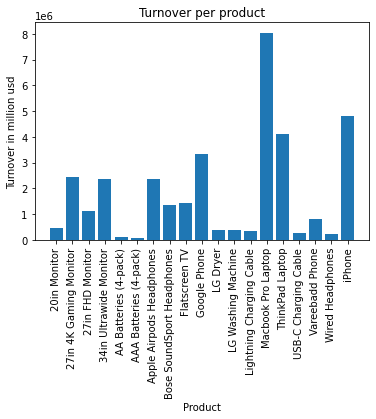

In [32]:
Product = dfpriceShort['Product']
Turnover = dfpriceShort['Turnover']

# in our bar plot, x is month and y is sales column in results dataframe
plt.bar(Product, Turnover)
plt.title('Turnover per product')
plt.xticks(Product, rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Turnover in million usd')

plt.show()

# What products are often sold together 

In [38]:
# I didn't do this 

# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
all_data = df
df1 = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head(100)

,Order ID,Grouped
0,295665,Macbook Pro Laptop
1,295666,LG Washing Machine
2,295667,USB-C Charging Cable
3,295668,27in FHD Monitor
4,295669,USB-C Charging Cable
...,...,...
106,295760,Bose SoundSport Headphones
107,295761,Lightning Charging Cable
108,295762,iPhone
109,295763,27in FHD Monitor


In [34]:
# I didn't do this 

# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Which product sold the most and why

In [35]:
product_group = all_data.groupby('Product')


# product is the index and we keep only Quatity Ordered
quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

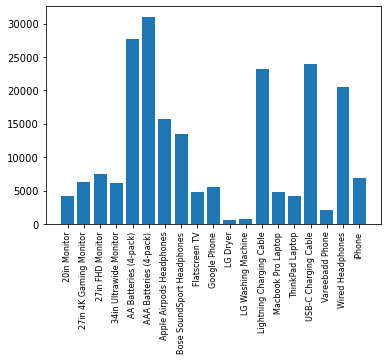

In [36]:
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-41-310c2b1df557>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-41-310c2b1df557>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


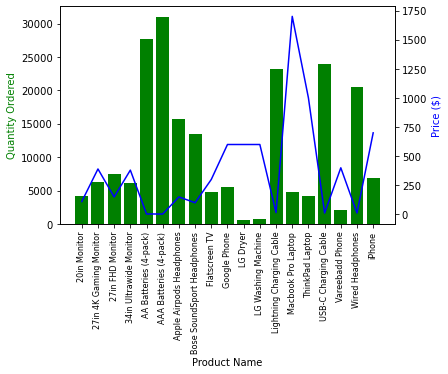

In [41]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

# when quantities are high, prices are low and vice versa 